<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250609_SVM_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 支持向量機 Support Vector Machine (SVM)

Support Vector Machine（SVM）是一種監督學習演算法，主要用於分類問題，也可以用於回歸問題。SVM的核心思想是將數據點映射到高維空間，並尋找一條超平面（hyperplane），這條超平面能夠最大化分類邊界，從而有效地將不同類別的數據分開。

## SVM的工作原理

1. **選擇最佳超平面**  
   SVM的目標是尋找一個超平面，這個超平面能夠將數據集中的不同類別區分開來，同時保持與邊界最近的數據點（稱為支持向量，support vectors）之間的距離最大化。這個最大化的邊界稱為"間隔"（margin）。
2. **支持向量**  
   支持向量是距離超平面最近的數據點，這些點對決定超平面的選擇至關重要。超平面的位置是由這些支持向量確定的，而不是所有的數據點。
3. **非線性分類**  
   如果數據不是線性可分的，SVM會利用**核技巧（kernel trick）**，將數據映射到高維空間，在這個空間中數據可能是線性可分的。常見的核函數有線性核、RBF（高斯核）等。
4. **分類邊界**  
   SVM的最終目標是根據找到的超平面來對新樣本進行分類。這樣，在新樣本到達時，SVM能夠決定它屬於哪一類。

## SVM的優點

- 在高維空間中表現良好，適合處理線性不可分的數據。
- 通過最大化間隔來提高分類精度，有較好的泛化能力。
- 可以通過核函數處理非線性問題。

## SVM的缺點

- 訓練過程可能比較慢，特別是在大規模數據集上。
- 對於選擇合適的核函數和調整超參數需要一定的經驗。

## 常見的應用領域

SVM作為一種強大的分類算法，廣泛應用於各種領域，以下是幾個常見的應用範疇：

### **圖像識別**
   - **人臉識別**：SVM被用於從圖像中檢測和識別人臉，這在安防系統和身份驗證中非常有用。
   - **手寫字符識別**：例如，SVM可以用來識別手寫數字，這在郵件分發和銀行支票處理中有應用。
### **文本分類**
   - **垃圾郵件分類**：SVM可以用來識別電子郵件是否是垃圾郵件，根據郵件的內容進行分類。
   - **情感分析**：用於分析社交媒體或評論中的文本情感，將其分類為正面、負面或中立。
### **金融領域**
   - **信貸評估**：SVM可用於信用風險分析，根據客戶的信用歷史來預測其信貸風險。
   - **股市預測**：SVM有時被用來預測股票市場的走勢或分析金融數據，儘管這一領域也面臨一定的挑戰。
### **醫療診斷**
   - **疾病診斷**：SVM可用於從醫學影像（如X光片、MRI）中分類或預測疾病，例如癌症或其他病變。
   - **患者分類**：根據患者的臨床數據，SVM可以幫助分類病人是否有某種特定的病症。
### **語音識別**
   - **語音分類**：SVM可用於語音識別系統中，將不同的語音模式分類為不同的語言、方言或命令。
### **機器人學與自動駕駛**
   - **路徑規劃與障礙物避讓**：SVM可以協助機器人識別環境中的障礙物，進行路徑規劃和避讓。
   - **自動駕駛**：在自動駕駛技術中，SVM可用來識別交通標誌、行人以及其他車輛，協助車輛進行決策。

SVM是一個靈活且強大的算法，可以應用於許多不同的領域，尤其在處理高維數據、複雜分類問題方面表現出色。其應用範圍涵蓋從圖像識別到金融風險分析，並且隨著技術的進步，SVM的應用領域仍在不斷擴展。

## 參考資料
* Python Data Science Handbook, Jake VanderPlas
* Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, Aurélien Géron



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

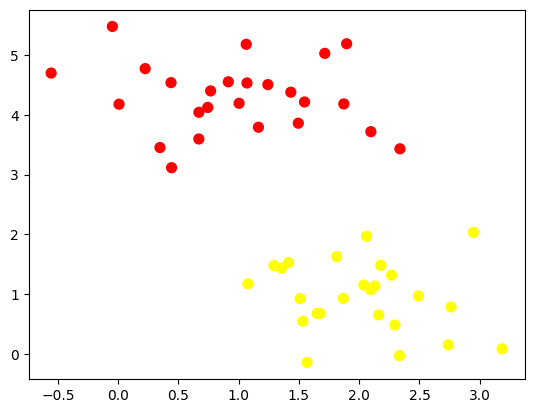

In [5]:
# 產生分類用的訓練示範資料
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

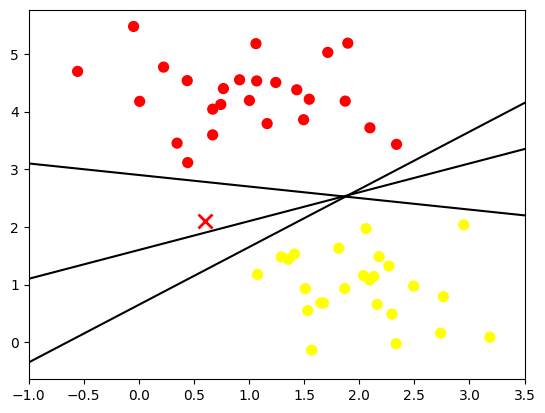

In [6]:
# 如果線性回歸一樣，我們也可以使用一條直線來將這兩類的資料區分開來
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

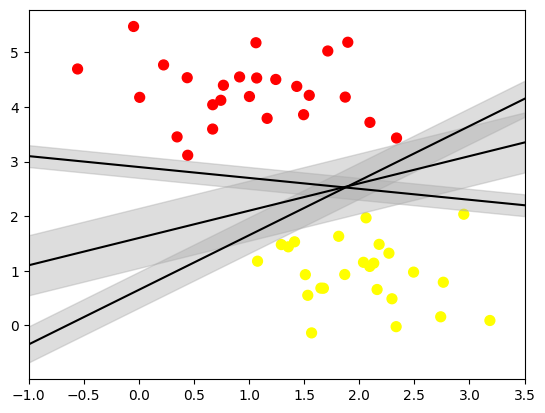

In [7]:
'''
雖然下面三條線都可以將兩類群的資料分開來，
但是這三條線跟兩類群的點最近距離區間範圍不同
SVM的目的是找出一條線使得這個區間範圍最大化
'''
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [8]:
# 建立一個SVM的物件，並使用資料來建立SVM模型
from sklearn.svm import SVC # "Support vector classifier"

# 回歸版的是SVR，分類版的是SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [9]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

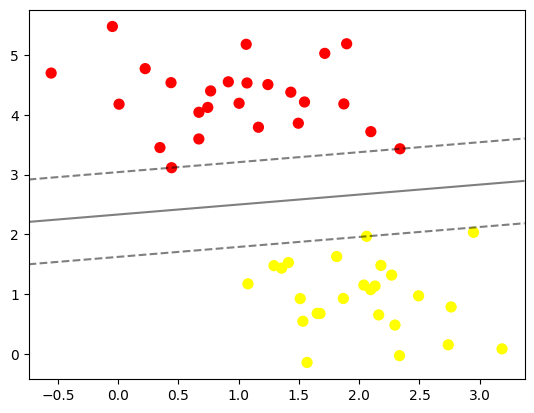

In [10]:
# 將SVM的分類效果視覺化
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

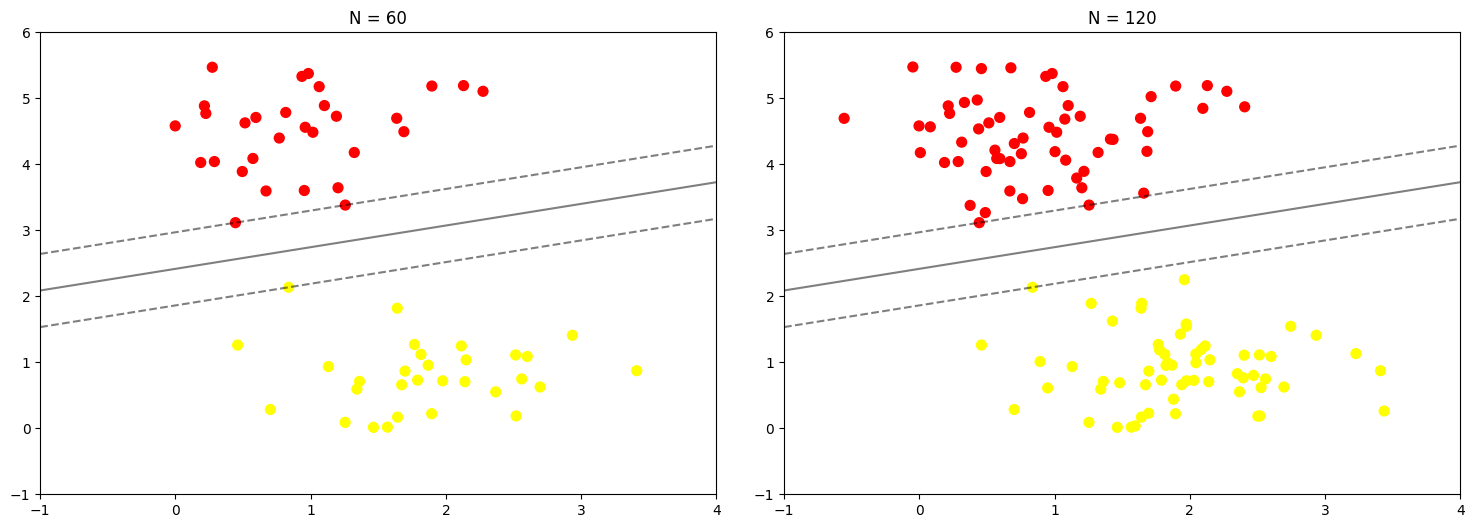

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [12]:
# 測試不同資料數量下SVM的學習狀況
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 20, 50, 100, 150, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 50, 100, 150, 200), value=10), Output()), _do…

## Kernel SVM
非線性的SVM

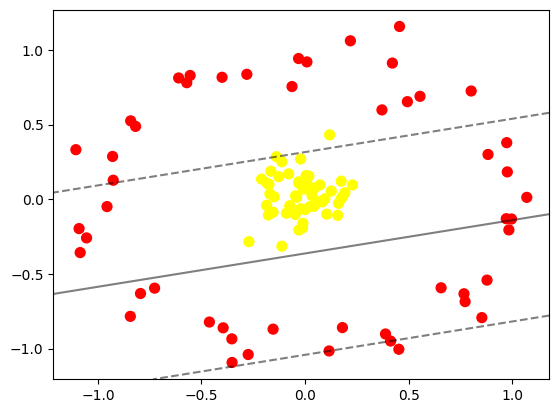

In [13]:
# 當資料的分布情形無法直接使用一條直線來進行分群時
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Kernel Function

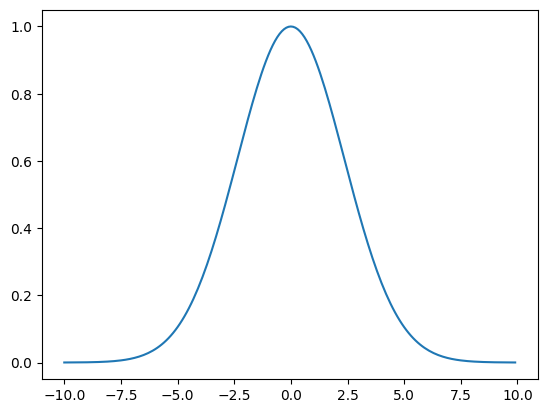

In [14]:
# 將上面資料中的 X 進行資料轉置後擴展到另一個維度 r
u = 0.09
xx = np.arange(-10,10,0.1)
yy = np.exp(-u*(xx*xx))
plt.plot(xx,yy)

## RBF SVM

In [15]:
# 將上面資料中的 X 進行資料轉置後擴展到另一個維度 r
# 創造高斯function
r = np.exp(-(X ** 2).sum(1))

In [16]:
# 我們可以發現在第三個維度上可以將兩類群的資料分離
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    plt.figure(figsize=(6,6))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[0, 30, 45, 60, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 45, 60, 90), value=30), IntSlider(…

In [17]:
# 這種增加非線性維度來進行分類的SVM可以使用下面的方法
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

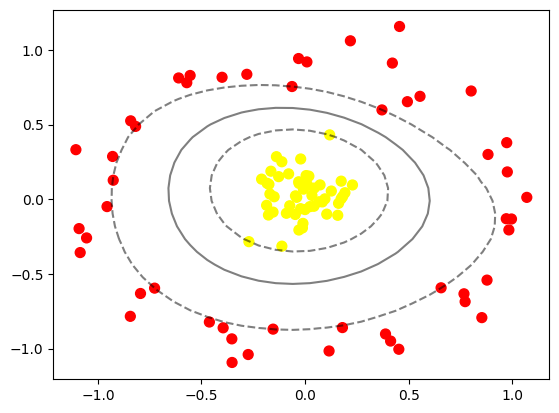

In [18]:
# RBF SVC 的訓練結果視覺化
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## 調整SVM的邊界容許值

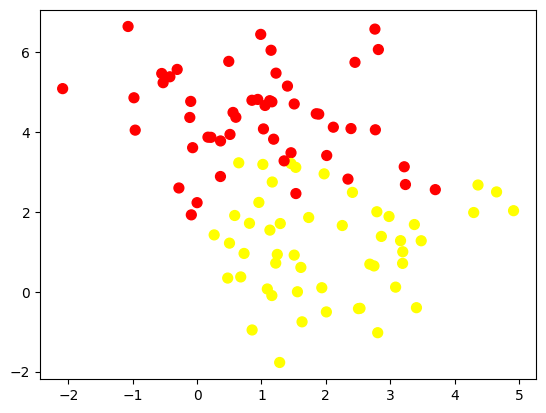

In [ ]:
# 有時資料的分類並不會非常完美
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

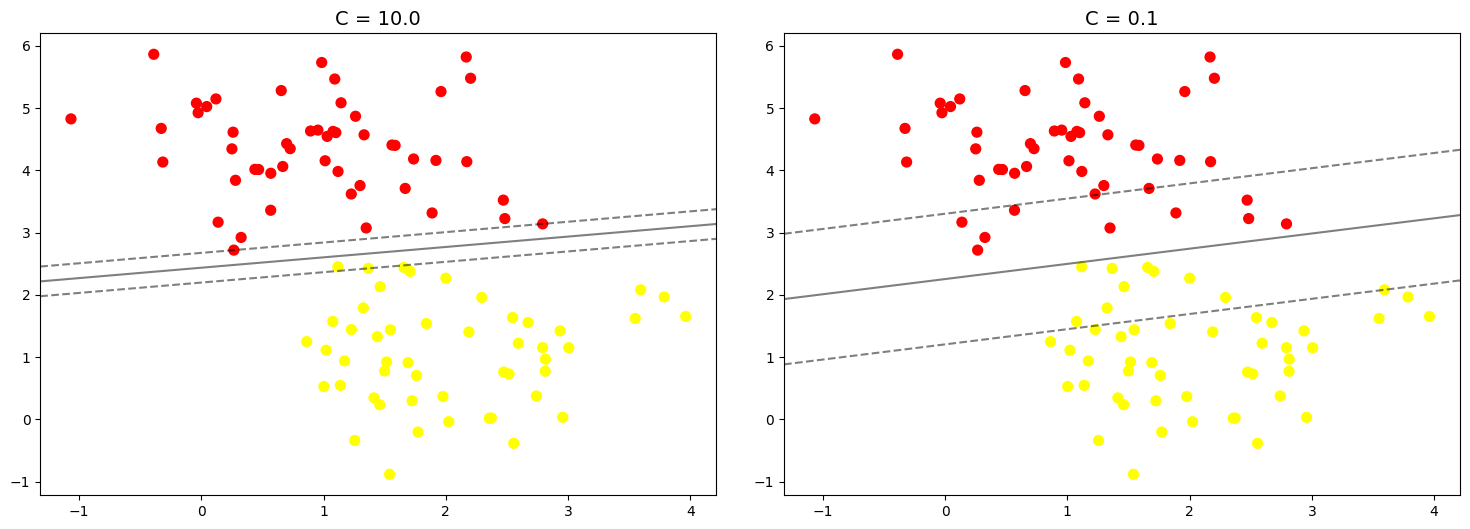

In [ ]:
# 這時候就可以透過C這個參數來調整邊界範圍的容許
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# SVM Visualization
https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

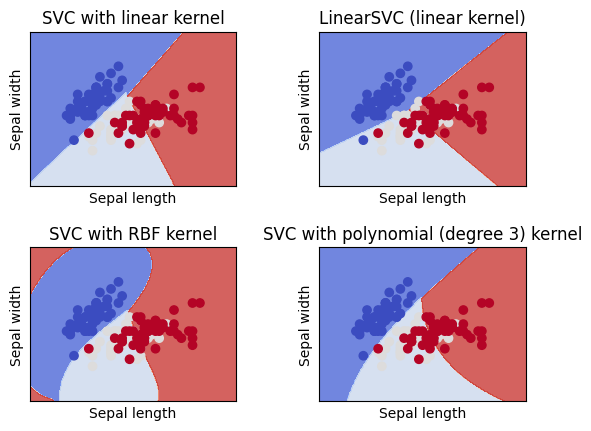

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
